In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler


df_epi = pd.read_csv('../data/epi/epi2020results20200604.csv')
df_hfi = pd.read_excel('../data/index_economic_freedom/index2020_data.xls')

In [2]:
df_epi.head()

,code,iso,country,EPI.new,HLT.new,AIR.new,PMD.new,HAD.new,OZD.new,H2O.new,...,LCB.rnk.new,GIB.rnk.new,GHP.rnk.new,APE.rnk.new,SDA.rnk.new,NXA.rnk.new,AGR.rnk.new,SNM.rnk.new,WRS.rnk.new,WWT.rnk.new
0,4,AFG,Afghanistan,25.5,20.0,17.7,25.4,7.3,16.9,28.0,...,1.0,77,1,179,176,176,48,48,134,134
1,24,AGO,Angola,29.7,20.4,26.8,32.6,17.8,34.4,12.8,...,136.0,67,78,176,174,176,123,123,134,134
2,8,ALB,Albania,49.0,44.5,41.2,44.2,34.6,60.1,54.0,...,26.0,130,87,1,1,1,94,94,92,92
3,784,ARE,United Arab Emirates,55.6,55.2,48.6,13.9,100.0,18.8,67.2,...,151.0,165,172,46,1,69,169,169,21,21
4,32,ARG,Argentina,52.2,60.2,56.9,54.7,60.9,48.7,64.7,...,67.0,132,132,88,89,90,2,2,77,77


In [3]:
df_hfi.head()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2020 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,136.0,33.0,54.7,48.3,30.0,24.8,...,Afghanistan,36.020,72.648,2.300,2.2,2016.89,1.5,0.626,139.200000,7.079
1,2,Albania,Albania,Europe,57.0,30.0,66.9,57.1,33.0,38.8,...,Albania,2.874,38.356,4.162,3.1,13344.54,13.9,2.029,1293.617724,68.590
2,3,Algeria,Algeria,Middle East and North Africa,169.0,14.0,46.9,37.9,35.0,28.3,...,Algeria,42.582,657.462,2.059,2.8,15439.92,12.2,4.270,1506.316886,36.872
3,4,Angola,Angola,Sub-Saharan Africa,154.0,35.0,52.2,36.9,14.3,15.1,...,Angola,29.250,199.319,-1.699,0.3,6814.33,7.3,19.629,-5732.491000,88.087
4,5,Argentina,Argentina,Americas,149.0,26.0,53.1,50.5,47.0,49.7,...,Argentina,44.560,915.125,-2.515,-0.3,20537.06,9.5,34.277,12161.837000,86.289


In [4]:
# Create EPI column and fill it with NaN
df_hfi['EPI'] = np.nan

In [5]:
no_epi_countries = []
for i, country in zip(df_hfi['Country Name'].index, df_hfi['Country Name']):
    epi = df_epi.loc[df_epi.country == country]['EPI.new']
    try:
        # Store epi value in Human Freedom Index dataset
        df_hfi.at[i, 'EPI'] = epi
    except:
        no_epi_countries.append(country)
    
df_hfi.head()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2020 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),EPI
0,1,Afghanistan,Afghanistan,Asia-Pacific,136.0,33.0,54.7,48.3,30.0,24.8,...,36.020,72.648,2.300,2.2,2016.89,1.5,0.626,139.200000,7.079,25.5
1,2,Albania,Albania,Europe,57.0,30.0,66.9,57.1,33.0,38.8,...,2.874,38.356,4.162,3.1,13344.54,13.9,2.029,1293.617724,68.590,49.0
2,3,Algeria,Algeria,Middle East and North Africa,169.0,14.0,46.9,37.9,35.0,28.3,...,42.582,657.462,2.059,2.8,15439.92,12.2,4.270,1506.316886,36.872,44.8
3,4,Angola,Angola,Sub-Saharan Africa,154.0,35.0,52.2,36.9,14.3,15.1,...,29.250,199.319,-1.699,0.3,6814.33,7.3,19.629,-5732.491000,88.087,29.7
4,5,Argentina,Argentina,Americas,149.0,26.0,53.1,50.5,47.0,49.7,...,44.560,915.125,-2.515,-0.3,20537.06,9.5,34.277,12161.837000,86.289,52.2


In [6]:
print(no_epi_countries)

['Burma', 'Congo, Democratic Republic of the Congo', 'Congo, Republic of', "Côte d'Ivoire", 'Hong Kong', 'Korea, North ', 'Korea, South', 'Kosovo', 'Kyrgyz Republic', 'Libya', 'Liechtenstein', 'Macau', 'São Tomé and Príncipe', 'Somalia', 'Syria', 'Taiwan ', 'United States', 'Vietnam', 'Yemen']


In [7]:
results = []
for country in no_epi_countries:
    country = country.split(',')[0]
    result = df_epi.query(f'country.str.contains("{country}")', engine='python')
    if not result.empty:
        results.append(result)
        
print(results)

[    code  iso            country  EPI.new  HLT.new  AIR.new  PMD.new  HAD.new  \
34   180  COD    Dem. Rep. Congo     36.4     22.4     29.9     45.4      9.8   
35   178  COG  Republic of Congo     30.8     18.1     20.0     20.0     18.7   

    OZD.new  H2O.new  ...  LCB.rnk.new  GIB.rnk.new  GHP.rnk.new  APE.rnk.new  \
34     21.7     13.5  ...        116.0           15            1          117   
35     30.1     14.6  ...        130.0           41           55          179   

    SDA.rnk.new  NXA.rnk.new  AGR.rnk.new  SNM.rnk.new  WRS.rnk.new  \
34          133           92          120          120          134   
35          176          176          110          110          119   

    WWT.rnk.new  
34          134  
35          119  

[2 rows x 141 columns],     code  iso            country  EPI.new  HLT.new  AIR.new  PMD.new  HAD.new  \
34   180  COD    Dem. Rep. Congo     36.4     22.4     29.9     45.4      9.8   
35   178  COG  Republic of Congo     30.8     18.1     2

In [8]:
no_epi_countries = ['Congo, Democratic Republic of the Congo',
                    'Congo, Republic of', 'Korea, South', 'United States']

for country in no_epi_countries:
    print(df_hfi.loc[df_hfi['Country Name'] == country].index)

Int64Index([37], dtype='int64')
Int64Index([38], dtype='int64')
Int64Index([89], dtype='int64')
Int64Index([177], dtype='int64')


In [9]:
df_hfi.at[37, 'EPI'] = df_epi.at[34, 'EPI.new'] #Congo, Democratic Republic of the Congo
df_hfi.at[38, 'EPI'] = df_epi.at[35, 'EPI.new'] #Congo, Republic of
df_hfi.at[89, 'EPI'] = df_epi.at[91, 'EPI.new'] #Korea, South
df_hfi.at[177, 'EPI'] = df_epi.at[170, 'EPI.new'] #United States

Text(0.78, 0.83, 'Zwitzerland')

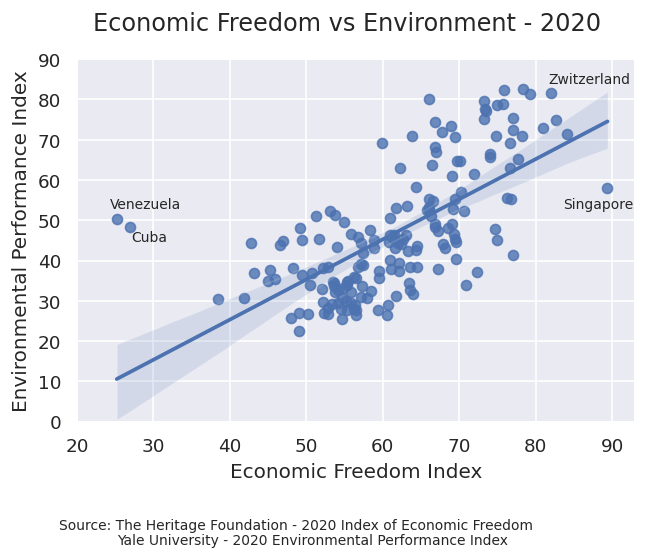

In [25]:
hfi_epi = df_hfi[['2020 Score', 'EPI']]
hfi_epi = hfi_epi.dropna()

x = hfi_epi['2020 Score'].values
y = hfi_epi['EPI'].values

sns.set_theme(color_codes=True)
ax = sns.regplot(x=x, y=y)
ax.set_xlim(20,93)
ax.set_ylim(0,90)
ax.figure.dpi=120
ax.xaxis.set_label_text('Economic Freedom Index')
ax.yaxis.set_label_text('Environmental Performance Index')
ax.figure.suptitle('Economic Freedom vs Environment - 2020')
ax.figure.text(0.1,-0.1,'Source: The Heritage Foundation - 2020 Index of Economic Freedom', fontsize='x-small')
ax.figure.text(0.18,-0.13,'Yale University - 2020 Environmental Performance Index', fontsize='x-small')
ax.figure.text(0.2,0.5,'Cuba', fontsize='x-small')
ax.figure.text(0.17,0.57,'Venezuela', fontsize='x-small')
ax.figure.text(0.8,0.57,'Singapore', fontsize='x-small')
ax.figure.text(0.78,0.83,'Zwitzerland', fontsize='x-small')

In [26]:
df_hfi.sort_values('2020 Score', ascending=False).head(10)

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2020 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),EPI
149,147,Singapore,Singapore,Asia-Pacific,1.0,1.0,89.4,96.8,92.9,92.4,...,5.639,565.811,3.231,3.3,100344.68,3.8,0.439,77646.125560,108.341,58.1
72,71,Hong Kong,HongKong,Asia-Pacific,2.0,2.0,89.1,93.6,76.8,84.7,...,7.483,480.494,3.021,2.8,64215.67,2.8,2.408,115661.925113,0.052,NaN
122,120,New Zealand,NewZealand,Asia-Pacific,3.0,3.0,84.1,93.3,79.1,93.9,...,4.929,197.827,2.991,3.4,40135.41,4.5,1.647,1403.743963,29.388,71.3
6,7,Australia,Australia,Asia-Pacific,4.0,4.0,82.6,82.8,86.1,89.3,...,25.168,1318.153,2.811,2.6,52373.46,5.4,1.979,60438.131813,40.672,74.9
160,158,Switzerland,Switzerland,Europe,5.0,1.0,82.0,87.4,81.5,90.1,...,8.484,548.483,2.531,1.9,64649.06,4.9,0.934,-87212.093508,40.508,81.5
79,78,Ireland,Ireland,Europe,6.0,2.0,80.9,86.6,64.4,82.8,...,4.898,385.851,6.813,10.5,78784.83,5.7,0.716,-66346.392191,65.203,72.8
176,174,United Kingdom,UnitedKingdom,Europe,7.0,3.0,79.3,92.2,82.7,89.9,...,66.466,3037.787,1.398,2.1,45704.62,4.0,2.478,64486.779263,86.857,81.3
45,45,Denmark,Denmark,Europe,8.0,4.0,78.3,86.3,84.6,93.0,...,5.781,301.319,1.217,2.0,52120.54,5.0,0.709,1789.498022,34.269,82.5
29,29,Canada,Canada,Americas,9.0,1.0,78.2,87.7,72.7,90.3,...,36.994,1836.816,1.834,1.9,49651.18,5.9,0.942,39624.621844,90.630,71.0
54,54,Estonia,Estonia,Europe,10.0,5.0,77.7,83.2,73.7,85.9,...,1.319,44.955,3.866,3.4,34095.76,5.5,3.412,1309.357995,8.050,65.3


In [27]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

x = StandardScaler().fit_transform(x)
y = StandardScaler().fit_transform(y)

linearFit = LinearRegression().fit(x,y)
y_hat = linearFit.predict(x)

print(f'2020 Score: {linearFit.coef_[0][0]:.2f}')
print(f'R^2: {linearFit.score(x,y):.2f}')
print(f'MSE: {mean_squared_error(y, y_hat):.2f}')
print(f'RMSE: {math.sqrt(mean_squared_error(y, y_hat)):.2f}')

x_flat = np.array(x, dtype=np.float).flatten()
y_flat = np.array(y, dtype=np.float).flatten()

r, p = pearsonr(x_flat, y_flat)
print('Pearsons correlation: %.2f' % r)

2020 Score: 0.66
R^2: 0.44
MSE: 0.56
RMSE: 0.75
Pearsons correlation: 0.66


| Feature     | Value |
| ----------- | ----------- |
| Pearson's Correlation      | 0.66   |
| R^2   | 0.44        |
| MSE   | 0.56       |
| RMSE   | 0.75       |

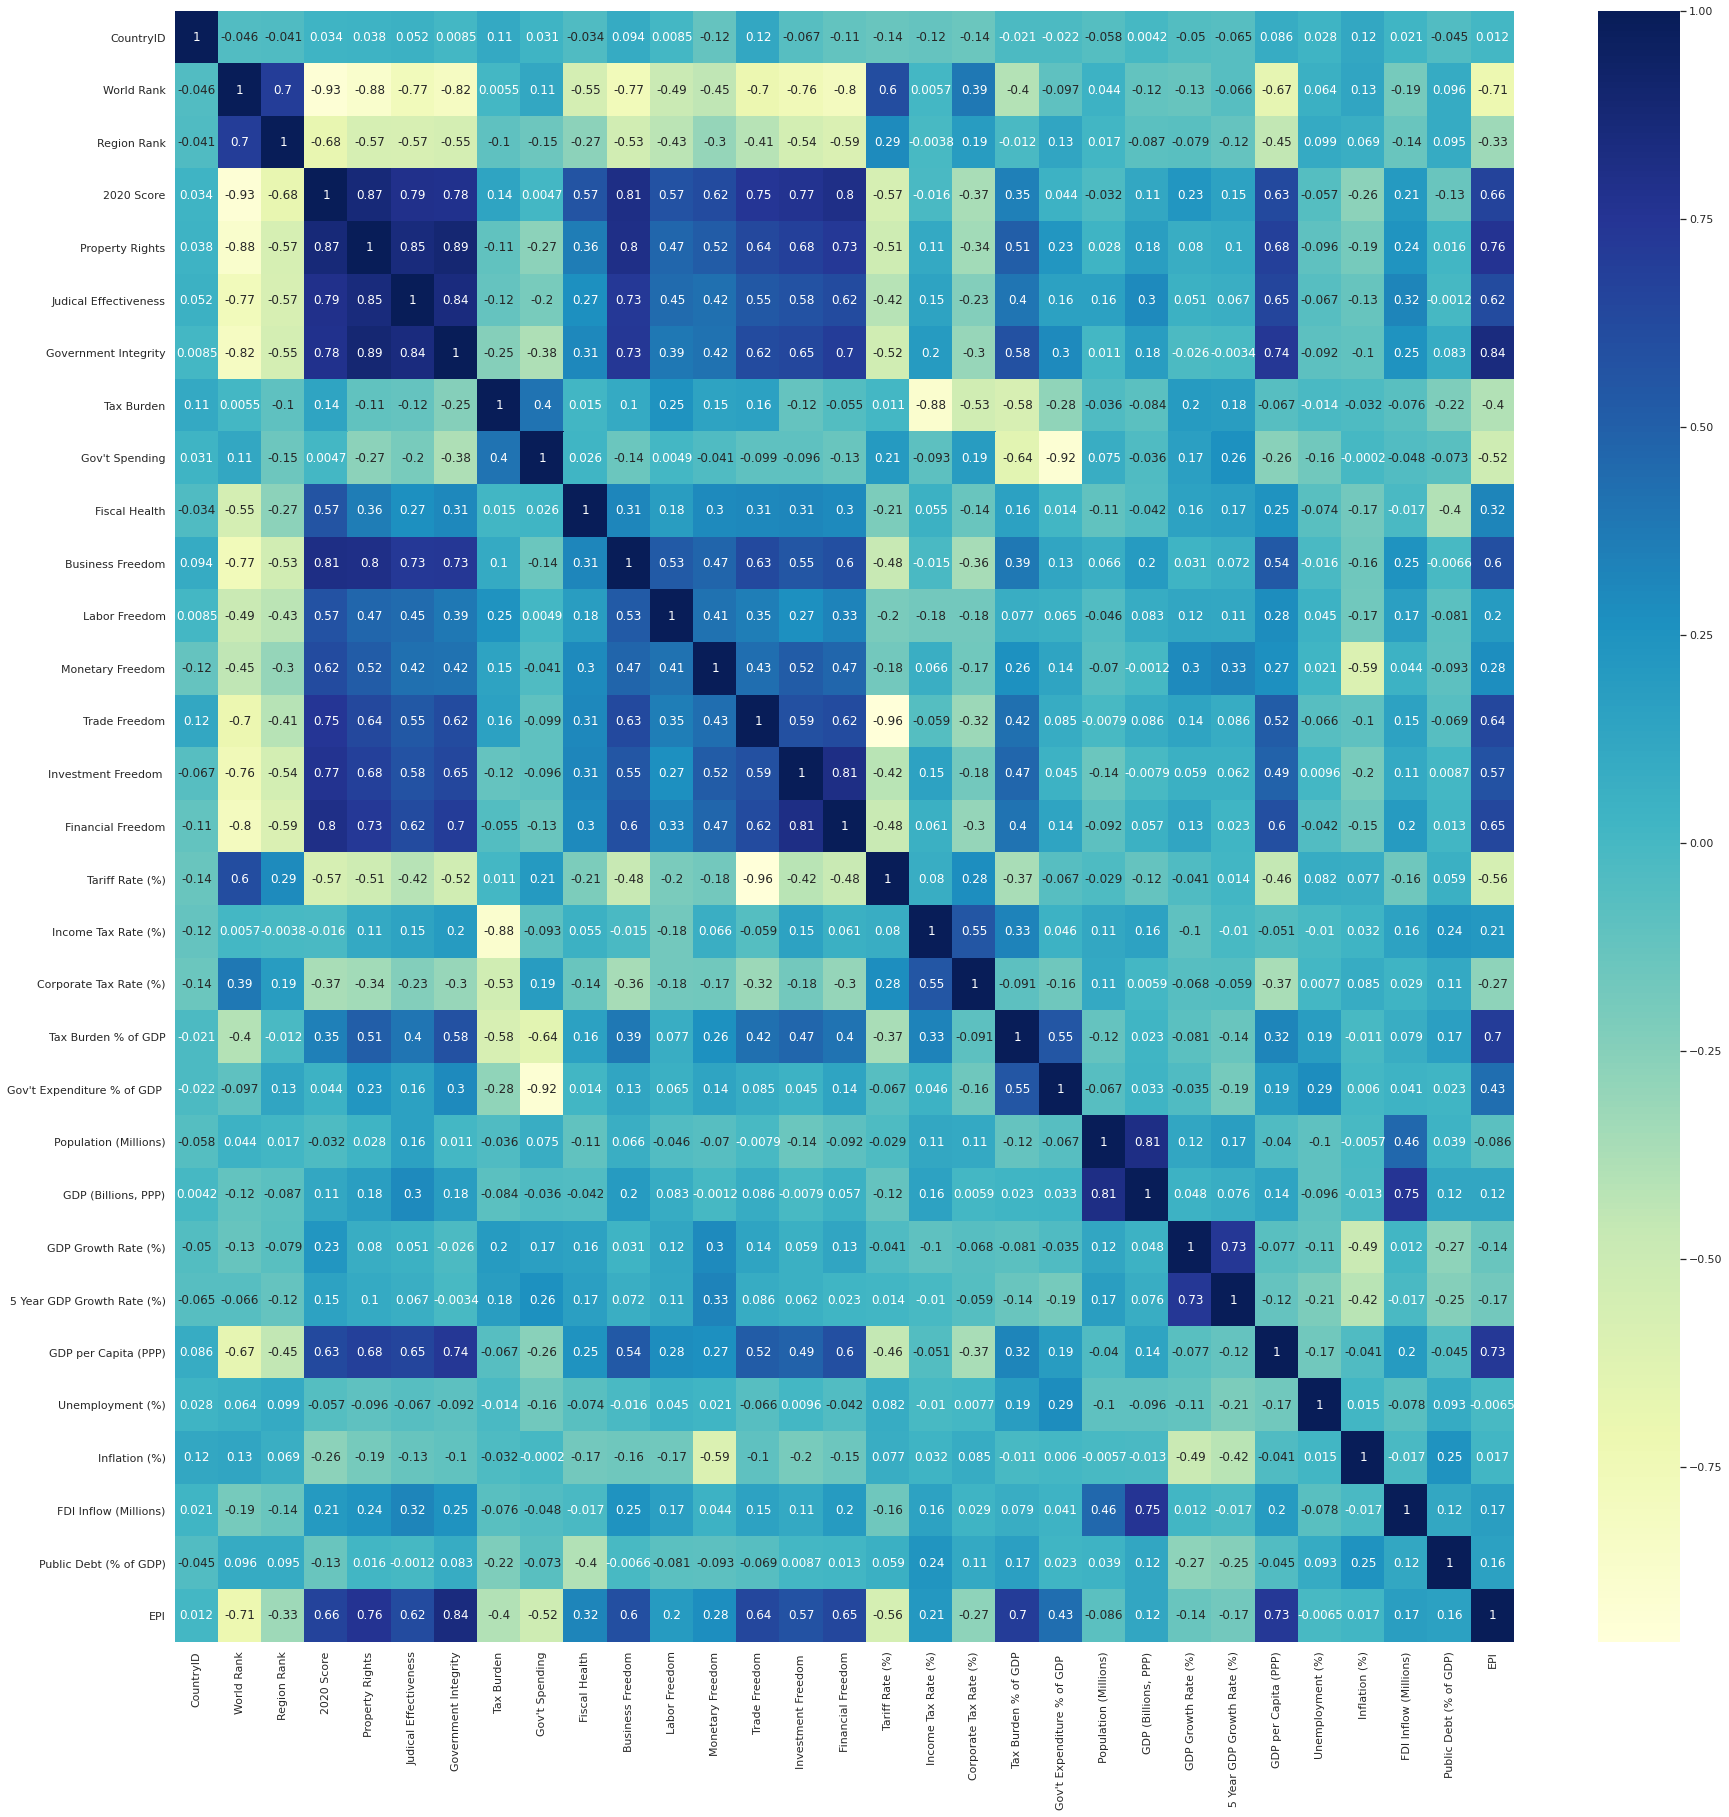

In [18]:
corr_matrix = df_hfi.corr()
fig, ax = plt.subplots(figsize=(30,30)) 
sns.heatmap(corr_matrix, annot=True, ax=ax, cmap="YlGnBu")
plt.show()

In [13]:
predictors = ['Country Name', 'Property Rights', 'Government Integrity', 'Trade Freedom', 'Financial Freedom', 'Tax Burden % of GDP',
              'GDP per Capita (PPP)', 'EPI']
hfi_epi = df_hfi[predictors]
hfi_epi = hfi_epi.dropna()
hfi_epi.sort_values('EPI', ascending=False).head(10)

,Country Name,Property Rights,Government Integrity,Trade Freedom,Financial Freedom,Tax Burden % of GDP,GDP per Capita (PPP),EPI
45,Denmark,86.3,93.0,86.4,80.0,46.0,52120.54,82.5
101,Luxembourg,86.4,90.3,86.4,80.0,38.7,106704.93,82.3
160,Switzerland,87.4,90.1,86.6,90.0,28.5,64649.06,81.5
176,United Kingdom,92.2,89.9,86.4,80.0,33.3,45704.62,81.3
59,France,85.9,83.3,81.4,70.0,46.2,45775.15,80.0
7,Austria,87.3,84.0,86.4,70.0,41.8,52137.43,79.6
58,Finland,92.3,96.1,86.4,80.0,43.3,46429.53,78.9
159,Sweden,88.8,91.4,86.4,80.0,44.0,52984.11,78.7
126,Norway,84.3,95.6,83.8,60.0,38.2,74356.07,77.7
63,Germany,80.5,82.8,86.4,70.0,37.5,52558.69,77.2


In [14]:
predictors = ['Property Rights', 'Government Integrity', 'Trade Freedom',
              'Financial Freedom', 'Tax Burden % of GDP', 'GDP per Capita (PPP)']
X = hfi_epi[predictors]
y = hfi_epi[['EPI']]

linearFit = LinearRegression().fit(X, y)
for predictor, coefficient in zip(predictors, linearFit.coef_[0]):
    print('{}: {:.2f}'.format(predictor, coefficient))


Property Rights: 0.01
Government Integrity: 0.21
Trade Freedom: 0.14
Financial Freedom: 0.05
Tax Burden % of GDP: 0.55
GDP per Capita (PPP): 0.00


In [15]:
X_norm = StandardScaler().fit_transform(X)
y_norm = StandardScaler().fit_transform(y)

linearFitNorm = LinearRegression().fit(X_norm, y_norm)
y_hat = linearFitNorm.predict(X_norm)

for predictor, coefficient in zip(predictors, linearFitNorm.coef_[0]):
        print(f'{predictor}: {coefficient:.2f}')
    
print(f'R^2 Score: {linearFitNorm.score(X_norm, y_norm):.2f}')
print(f'MSE: {mean_squared_error(y_norm, y_hat):2.f}')
print(f'RMSE: {math.sqrt(mean_squared_error(y_norm, y_hat)):.2f}')

Property Rights: 0.01
Government Integrity: 0.28
Trade Freedom: 0.11
Financial Freedom: 0.05
Tax Burden % of GDP: 0.36
GDP per Capita (PPP): 0.29
R^2 Score: 0.82
MSE: 0.1849637077934119
RMSE: 0.4300740724496327


| Feature     | SLR | MLR |
| ----------- | ----------- | ----------- |
| Pearson's Correlation   | 0.66   |    |
| R^2   | 0.44  | 0.82 |
| MSE   | 0.56  | 0.18 |
| RMSE   | 0.75 | 0.43 |

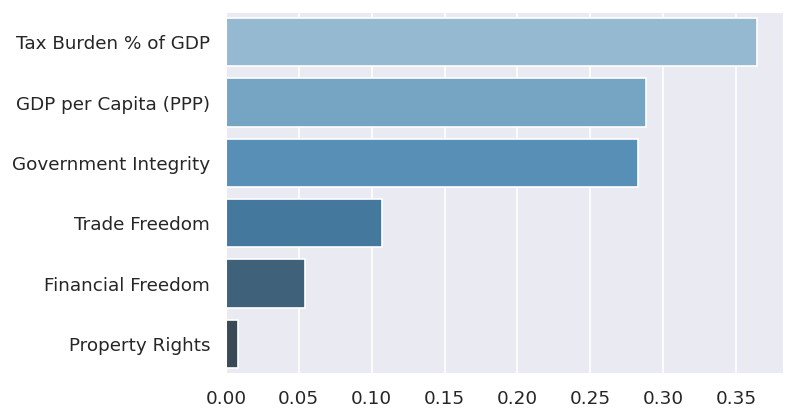

In [33]:
ax = sns.barplot(x=linearFitNorm.coef_[0], y=predictors, palette="Blues_d",
                 order=['Tax Burden % of GDP', 'GDP per Capita (PPP)', 'Government Integrity',
                        'Trade Freedom','Financial Freedom','Property Rights'])
ax.figure.dpi = 120